# Data Science and Data Mining session on Recommenders system using Singular Value Decomposition.

Imagine you're at a film festival where each movie has different aspects like genres, actors, directors, and reviews that all come together to create the full picture. Just like in a movie, where each scene is well scripted and shot, in coding, each snippet of code plays a crucial role in the overall functionality. In this cinematic journey, we'll look at the code like the script of a film, with each part contributing to the storytelling.

## Basic Matrices

This film festival isn't just about the glitz and glamour; it's about understanding the core elements that make up a great cinematic experience. Here, we're talking about the fundamental operations with matrices, the building blocks of linear algebra just like the crew behind the scenes that make a movie possible.

In [ ]:
import numpy as np

# Define two 2x2 matrices for basic operations.
matrix_a = np.array([[1, 2],
                    [3, 4]])
matrix_b = np.array([[2, 2],
                    [2, 2]])
# Display the matrices.
matrix_a, matrix_b

(array([[1, 2],
        [3, 4]]),
 array([[2, 2],
        [2, 2]]))

In [ ]:
# Perform matrix addition.
added_matrix = matrix_a + matrix_b
added_matrix

array([[3, 4],
       [5, 6]])

In [ ]:
# Perform matrix subtraction.
subtracted_matrix = matrix_a - matrix_b
subtracted_matrix

array([[-1,  0],
       [ 1,  2]])

In [ ]:
# Scale matrix A by a factor of 3.
scaled_matrix = 3 * matrix_a
scaled_matrix

array([[ 3,  6],
       [ 9, 12]])

In [ ]:
# Transpose matrix A.
transposed_a = matrix_a.T
transposed_a

array([[1, 3],
       [2, 4]])

In [ ]:
# Perform matrix multiplication.
multiplied_matrix = np.dot(matrix_a, matrix_b)
multiplied_matrix

array([[ 6,  6],
       [14, 14]])

In [ ]:
# Generate an identity matrix of size 2x2.
identity_matrix = np.eye(2)
identity_matrix

array([[1., 0.],
       [0., 1.]])

In [ ]:
# Calculate the inverse of matrix A.
inverse_matrix = np.linalg.inv(matrix_a)
inverse_matrix

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
# Calculate the determinant of matrix A.
determinant = np.linalg.det(matrix_a)
determinant

-2.0000000000000004

In [ ]:
# Create a larger 3x3 matrix.
large_matrix = np.array([[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]])
large_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
# Extract upper and lower triangular parts of the large matrix.
upper_triangle = np.triu(large_matrix)
lower_triangle = np.tril(large_matrix)

upper_triangle, lower_triangle

(array([[1, 2, 3],
        [0, 5, 6],
        [0, 0, 9]]),
 array([[1, 0, 0],
        [4, 5, 0],
        [7, 8, 9]]))

In [ ]:
# Flatten the large matrix into a 1D array.
flattened = large_matrix.flatten()

flattened

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Reshape the large matrix to a different size.
reshaped_matrix = large_matrix.reshape(9, 1)

reshaped_matrix

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [ ]:
# Create a matrix with random values.
random_matrix = np.random.rand(3, 3)

random_matrix

array([[0.26562562, 0.30421398, 0.22447455],
       [0.25421165, 0.92435788, 0.5926978 ],
       [0.04600042, 0.31959512, 0.0460607 ]])

In [ ]:
# Determine the rank of matrix A.
rank_matrix_a = np.linalg.matrix_rank(matrix_a)

f"Rank of matrix_a: {rank_matrix_a}"

'Rank of matrix_a: 2'

In [ ]:
# Calculate the trace of matrix A.
# Sum of the elements on the main diagonal of matrix A.
trace_matrix_a = np.trace(matrix_a)
f"Trace of matrix_a: {trace_matrix_a}"

'Trace of matrix_a: 5'

In [ ]:
# Compute the norm of matrix A.
norm_matrix_a = np.linalg.norm(matrix_a) # Euclidean norm (or Frobenius norm for matrices) of matrix A.
f"Norm of matrix_a: {norm_matrix_a}"

'Norm of matrix_a: 5.477225575051661'

In [ ]:
# Multiply matrix A by -1 to get the negative matrix.
negative_matrix = -matrix_a
negative_matrix

array([[-1, -2],
       [-3, -4]])

In [ ]:
# Define two vectors.
vector_x = np.array([1, 2])
vector_y = np.array([3, 4])

# Compute the outer product of the two vectors.
outer_product = np.outer(vector_x, vector_y)
outer_product

array([[3, 4],
       [6, 8]])

In [ ]:
# Calculate eigenvalues and eigenvectors of matrix A.
eigenvalues, eigenvectors = np.linalg.eig(matrix_a)
eigenvalues, eigenvectors

(array([-0.37228132,  5.37228132]),
 array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

This sets the foundation for our journey through the world of linear algebra, much like the prep work done before the cameras start rolling on a film set.

## SVD

Singular Value Decomposition (SVD) can be likened to the editing process of a movie. Just as an editor deconstructs a film into its essential scenes, sounds, and effects to then reconstruct it into the final masterpiece, SVD breaks down a matrix into its fundamental components. It's a technique that separates the 'scenes' (matrices) into simple, manageable pieces that, when combined, recreate the original matrix.

Let's start by manually crafting our own SVD, followed by using the powerful NumPy library to achieve the same with less manual labor

In [ ]:
# Calculating the eigenvalues and eigenvectors for A^T * A
eigenvalues_v, eigenvectors_v = np.linalg.eig(np.dot(matrix_a.T, matrix_a))
eigenvalues_v, eigenvectors_v

(array([ 0.13393125, 29.86606875]),
 array([[-0.81741556, -0.57604844],
        [ 0.57604844, -0.81741556]]))

This step is similar to finding the core themes of our 'film' (matrix) that will guide the editing process.

In [ ]:
# Sorting the eigenvectors based on eigenvalues' descending order
idx = eigenvalues_v.argsort()[::-1]   # Get the indices that would sort the eigenvalues in descending order.
eigenvalues_v = eigenvalues_v[idx]    # Sort the eigenvalues.
eigenvectors_v = eigenvectors_v[:, idx]  # Sort the eigenvectors according to the sorted eigenvalues.

eigenvalues_v, eigenvectors_v

(array([29.86606875,  0.13393125]),
 array([[-0.57604844, -0.81741556],
        [-0.81741556,  0.57604844]]))

It's like ranking the most impactful scenes to the least impactful to decide the editing flow.

In [ ]:
# Calculating the eigenvalues and eigenvectors for A * A^T
eigenvalues_u, eigenvectors_u = np.linalg.eig(np.dot(matrix_a, matrix_a.T))
eigenvalues_u, eigenvectors_u

(array([ 0.13393125, 29.86606875]),
 array([[-0.9145143 , -0.40455358],
        [ 0.40455358, -0.9145143 ]]))

Here, it's like we're looking at the film from a different angle to ensure we've got all perspectives covered.

In [ ]:
# Sorting the eigenvectors based on eigenvalues' descending order
idx = eigenvalues_u.argsort()[::-1]   # Get the indices for sorting in descending order.
eigenvalues_u = eigenvalues_u[idx]    # Sort the eigenvalues.
eigenvectors_u = eigenvectors_u[:, idx]  # Sort the eigenvectors according to the sorted eigenvalues.
eigenvalues_u, eigenvectors_u

(array([29.86606875,  0.13393125]),
 array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]))

Again, we arrange our scenes to ensure the narrative flows in the most powerful way.

In [ ]:
# The singular values are square roots of eigenvalues from A^T * A or A * A^T
singular_values = np.sqrt(eigenvalues_v)
singular_values

array([5.4649857 , 0.36596619])

These are like the key moments of our scenes - they dictate the emotion and pace of our 'film'.

In [ ]:
# Constructing the matrices U, S, and VT from the eigenvectors and singular values
U = eigenvectors_u            # Matrix U from the eigenvectors of A * A^T.
S = np.diag(singular_values)  # Diagonal matrix S from the singular values.
VT = eigenvectors_v.T         # Matrix VT (transpose of V) from the eigenvectors of A^T * A.

U, S, and VT are like our raw footage, sound design, and special effects that when combined create the movie.


In [ ]:
U, S, VT

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([[5.4649857 , 0.        ],
        [0.        , 0.36596619]]),
 array([[-0.57604844, -0.81741556],
        [-0.81741556,  0.57604844]]))

Next, lets use Numpy to get the SVD of `matrix_a`.

In [ ]:
U, S, VT = np.linalg.svd(matrix_a)
U, S, VT

(array([[-0.40455358, -0.9145143 ],
        [-0.9145143 ,  0.40455358]]),
 array([5.4649857 , 0.36596619]),
 array([[-0.57604844, -0.81741556],
        [ 0.81741556, -0.57604844]]))

This is like the magic of modern film editing, using NumPy's built-in SVD function to do all the above in one go.

In this process, we've seen the roles of the director, editor, and special effects team to decompose and understand the essence of our matrix. Much like in film where every part of the footage is crucial, in SVD, every component—the U matrix, the singular values in S, and the VT matrix—plays an important role in reconstructing the original matrix.

## Recommender System using SVD

Alright! Now, instead of being behind the scenes, imagine you're in the audience, looking for the next movie to watch. But there are thousands to choose from! How do you decide? This is where a personalized movie recommender system comes in - think of it as a friend who knows your taste and suggests what you might like to watch next.

The recommender system uses the opinions of many viewers to help you find movies you'll enjoy. Just like your only friend to whom you are not the only friend.

In [ ]:
import pandas as pd

# Load the ratings and movies from a CSV file.
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

FileNotFoundError: ignored

Peek into the first few rows of each dataset.


In [ ]:
ratings.head()

NameError: ignored

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# Create a matrix where each row represents a user and each column a movie.
# Fill in missing ratings with 0, like empty seats in a theater.
user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_movie_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


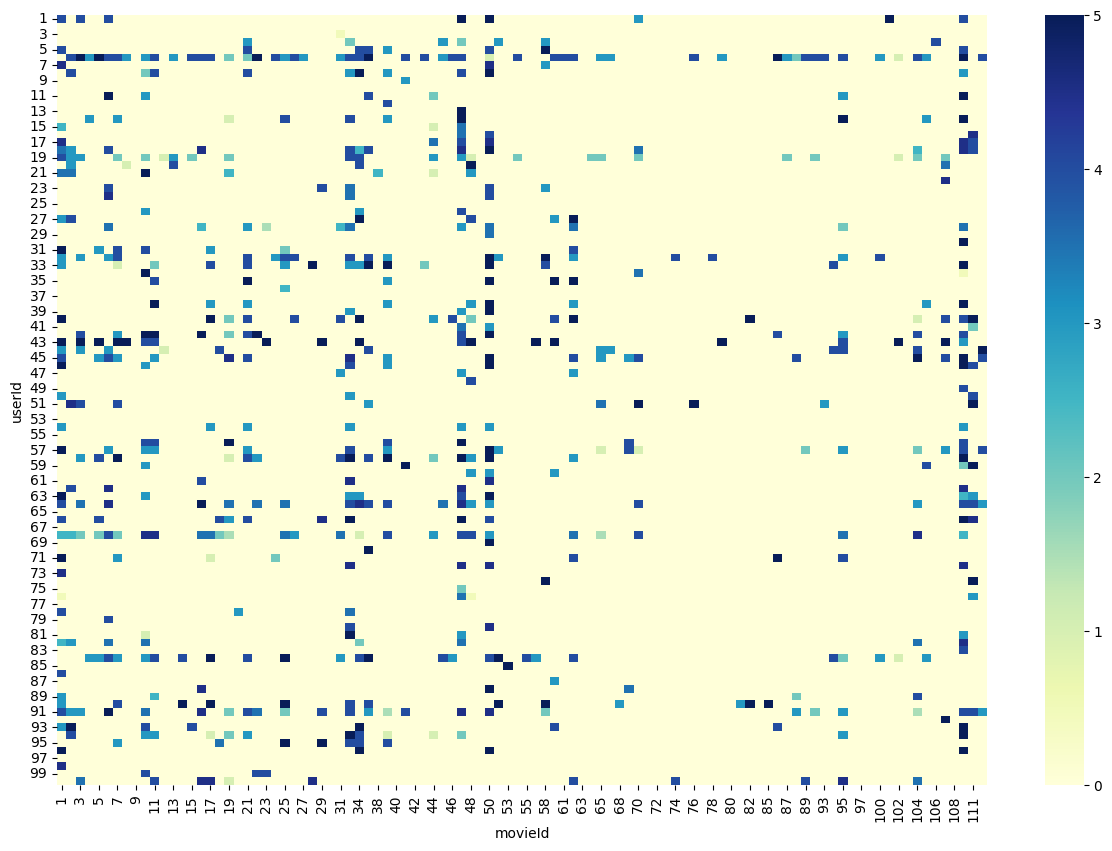

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize a portion of the matrix as a heatmap, like a bird's eye view of our festival audience.
plt.figure(figsize=(15, 10))
sns.heatmap(user_movie_matrix.iloc[:100, :100], cmap="YlGnBu")
plt.show()

In [ ]:
# Calculate how sparse the matrix is.
sparsity = float(len(user_movie_matrix.values.nonzero()[0]))
sparsity /= (user_movie_matrix.shape[0] * user_movie_matrix.shape[1])
sparsity_percent = sparsity * 100

print(f"Our scroll is {100 - sparsity_percent:.2f}% empty.")

Our scroll is 98.30% empty.


In [ ]:
from scipy.sparse import csr_matrix
# Convert the user-movie matrix to a sparse matrix format for efficiency,
# like condensing a thick festival guide into a handy thin quick-guide.
user_movie_matrix_csr = csr_matrix(user_movie_matrix.fillna(0))

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set.
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# Create a matrix from the training set.
train_matrix = train.pivot(index='userId', columns='movieId', values='rating').fillna(0)
train_matrix_csr = csr_matrix(train_matrix.values)

# Create a matrix from the test dataset.
test_matrix = test.pivot(index='userId', columns='movieId', values='rating').fillna(0)
test_matrix_csr = csr_matrix(test_matrix.values)

In [ ]:
from scipy.sparse.linalg import svds

# Perform SVD on the training matrix.
U, S, VT = svds(train_matrix_csr, k=50)
S = np.diag(S)

In [ ]:
# Multiply U, S, and VT to get the reconstructed matrix
# Like a director's cut put all together back into a full movie.
reconstructed_matrix = np.dot(U, np.dot(S, VT))
reconstructed_matrix

array([[ 2.35265963e+00,  4.98363386e-01,  9.90745733e-01, ...,
        -2.06504909e-02, -2.06504909e-02, -5.54826998e-02],
       [ 1.24298246e-01, -1.35553750e-02,  9.31028725e-02, ...,
         1.75638493e-02,  1.75638493e-02,  1.81154921e-02],
       [ 4.22753096e-02, -5.51945029e-02,  5.59258129e-02, ...,
        -7.84593075e-04, -7.84593075e-04,  4.72087004e-04],
       ...,
       [ 6.36346222e-01,  2.64228210e+00,  2.42668329e+00, ...,
        -2.02233591e-02, -2.02233591e-02,  9.65330698e-02],
       [ 1.00752406e+00,  3.39750761e-01, -5.36372720e-02, ...,
        -6.87719050e-03, -6.87719050e-03, -6.48842231e-03],
       [ 5.34334771e+00, -2.17797786e-01, -1.47447155e-01, ...,
        -5.46537897e-04, -5.46537897e-04,  1.37232159e-02]])

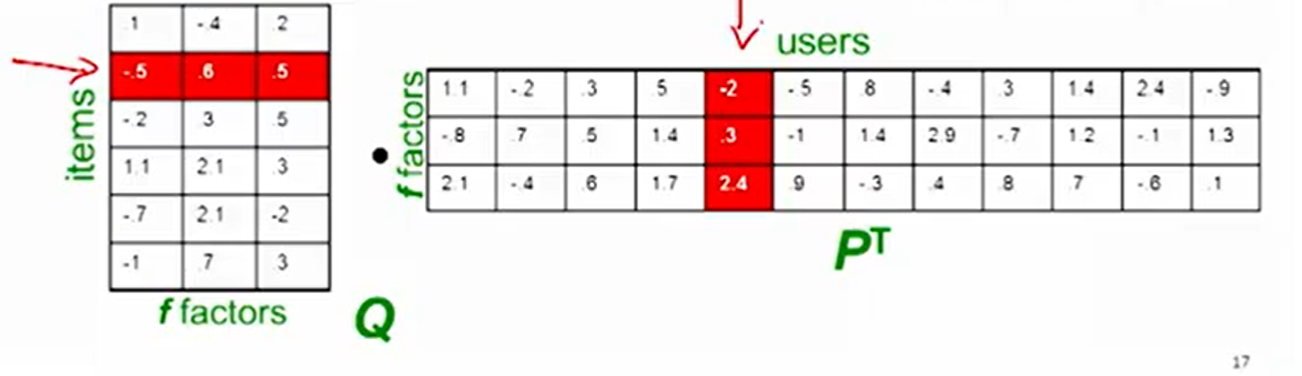

In [ ]:
# Calculate the mean rating for each user in the training set.
user_means = train_matrix_csr.mean(axis=1)
user_means = np.array(user_means).flatten()

# Add the mean back to the reconstructed matrix to get the predicted ratings.
predicted_ratings = reconstructed_matrix + user_means[:, np.newaxis]

# Create a DataFrame for the predicted ratings.
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=train_matrix.index, columns=train_matrix.columns)

In [ ]:
predicted_ratings_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,191005,193565,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,2.445724,0.591428,1.083810,0.141088,-0.283119,2.537162,-0.256748,0.101626,0.324424,0.714744,...,0.066514,0.072414,0.069464,0.069464,0.072414,0.069464,0.072414,0.072414,0.072414,0.037582
2,0.135208,-0.002646,0.104012,0.011356,0.082450,-0.013860,0.092648,0.045796,0.036884,0.039525,...,0.033492,0.028473,0.030982,0.030982,0.028473,0.030982,0.028473,0.028473,0.028473,0.029025
3,0.051181,-0.046289,0.064832,-0.000140,-0.025813,0.107167,-0.034155,-0.005066,0.003727,0.044895,...,0.007897,0.008121,0.008009,0.008009,0.008121,0.008009,0.008121,0.008121,0.008121,0.009378
4,1.759438,0.408598,0.192884,0.093099,0.232959,0.245129,0.838472,0.195393,0.162134,0.211093,...,0.084493,0.080288,0.082390,0.082390,0.080288,0.082390,0.080288,0.080288,0.080288,0.058851
5,0.827320,0.716310,-0.027427,0.125725,0.239771,0.345418,0.181171,0.130090,-0.083479,0.978920,...,0.016781,0.016491,0.016636,0.016636,0.016491,0.016636,0.016491,0.016491,0.016491,0.008711


Now, let's work on the function that outputs the top `k` recommendations for a user from the dataset. Don't worry, later in the same notebook we got you a new friend who recommends you a few movies based on your taste.

In [ ]:
# Define a function to recommend movies to a user.

def recommend(user_id, num=5):
  user_idx = user_movie_matrix.index.get_loc(user_id)
  # Get the user's predictions and sort them in descending order.
  sorted_predictions = predicted_ratings_df.iloc[user_idx].sort_values(ascending=False).reset_index()
  sorted_predictions.columns = ['movieId', 'Predictions']

  # Find out which movies the user has already rated.
  user_data = ratings[ratings.userId == user_id]

  # Recommend movies the user hasn't rated yet.
  recommendations = movies[~movies['movieId'].isin(user_data['movieId'])]
  recommendations = recommendations.merge(sorted_predictions, on='movieId')

  # Sort the recommendations by the predicted rating.
  recommendations = recommendations.sort_values('Predictions', ascending=False).iloc[:num]

  return recommendations

# Test the recommendation function for a user.
recommend(10, 5)

,movieId,title,genres,Predictions
6818,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,1.910038
271,318,"Shawshank Redemption, The (1994)",Crime|Drama,1.393755
3874,5816,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,1.330142
6398,63082,Slumdog Millionaire (2008),Crime|Drama|Romance,1.255193
6759,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX,1.088330


Think of the `recommend` function as a user's personal festival assistant, who gives a customized playlist for the user. It's like having a quick chat where you mention your favorite movies, and then the assistant compiles a list of films you're likely to enjoy based on what other like-minded people have enjoyed.

When you ask for a recommendation, the system looks into the festival's database, filtering through rows and columns of other users' ratings, considering which films stand out as must-sees for someone with a taste similar to you.

Imagine standing in front of a grand billboard, with the top movies recommended just for you. Each title is with a score that reflects how well it's expected to stand with your preferences. That's what our `visualize_recommendations` does.

In [ ]:
def visualize_recommendations(user_id, k=10):
  # This is like shining a spotlight on users top movie picks.
  recommendations = recommend(user_id, k)

  # Here, we're painting the billboard with the names and scores of users recommendations.
  plt.barh(recommendations['title'], recommendations['Predictions'])
  plt.xlabel('Prediction Score')
  plt.ylabel('Movies')
  plt.title(f"Top {k} movie recommendations for user {user_id}")

  # And we make sure to present them in the descending order.
  plt.gca().invert_yaxis()
  plt.show()

This visual display isn't just a fancy thing to do; it's a clear and impactful way to see which films the algorithm predicts you'll love the most.

## Evaluation

There are several metrics to evaluate the performance of a recommender system:
1. RMSE: Root Mean Square Error
2. Precision
3. Recall
4. F1 Score
5. MAP: Mean Average Precision
6. NDCG: Normalized Discounted Cumulative Gain

When we measure the success of a film, we don't just count the number of sold-out screenings; we look at various aspects that tell us how much the audience enjoyed the film. Each metric we use is like a different critic's review, giving us insights from one's own perspective.

### Root Mean Square Error

Imagine if every person walked out of each movie at the festival and rated their satisfaction on a scale. RMSE would be like calculating the average discrepancy between the satisfaction we predicted they would have and the actual ratings they gave after walking out. A lower RMSE means our predictions were close to the real experience.

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(predicted, actual):
  # We obtain the predicted ratings matrix values.
  predicted = predicted[actual.nonzero()].flatten()  # Ignore zero terms.
  # And the actual ratings from the data.
  actual = actual[actual.nonzero()].flatten()

  # RMSE: Like an accuracy gauge, it tells us how far our movie predictions were from the audience's true ratings.
  rmse_ = np.sqrt(mean_squared_error(predicted, actual))
  return rmse_

train_rmse = rmse(predicted_ratings, train_matrix_csr.toarray())
test_rmse = rmse(predicted_ratings, test_matrix_csr.toarray())
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 2.0773
Test RMSE: 3.3361


### Precision and Recall

* Precision: Out of the top 'k' recommendations, how many were relevant?
* Recall: Out of all the relevant items, how many were found in the top 'k' recommendations?

`Precision` would be like looking at the most promoted and hyped-up films of the festival and checking how many lived up to the hype (Liger is an exception!).

`Recall`, on the other hand, is like making sure all the hidden gems of the festival were included in those top picks.

In [ ]:
# Define a function for precision and recall.
def precision_recall(predicted, actual, k=10):
  # Lists to store precision and recall values for each user
  precision_list = []
  recall_list = []

  # Loop through each user to calculate their precision and recall
  for user_id in range(actual.shape[0]):

    # For each user, get their predicted ratings and sort them
    user_pred = predicted[user_id, :]
    user_actual = actual[user_id, :]

    # Select the top 'k' items from their predicted ratings
    top_k_pred = user_pred.argsort()[::-1][:k]

    # Find which items the user has actually rated (their actual ratings)
    actual_rated = user_actual.nonzero()[0]

    # Calculate precision: how many of the top 'k' recommended items are relevant (i.e., actually rated by the user)
    precision = sum(map(lambda x: x in actual_rated, top_k_pred)) / k

    # Calculate recall: how many of the relevant items are in the top 'k' recommendations
    recall = sum(map(lambda x: x in top_k_pred, actual_rated)) / len(actual_rated)

    # Append the precision and recall for this user to our lists
    precision_list.append(precision)
    recall_list.append(recall)

    # Return the average precision and recall across all users
    return np.mean(precision_list), np.mean(recall_list)


train_precision, train_recall = precision_recall(predicted_ratings, train_matrix_csr.toarray(), k=10)
test_precision, test_recall = precision_recall(predicted_ratings, test_matrix_csr.toarray(), k=10)
print(f"Train Precision: {train_precision:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Test Recall: {test_recall:.4f}")

Train Precision: 0.7395
Test Precision: 0.0156


### F1-score



F1 score is the harmonic mean of precision and recall and a better metric than accuracy, to consider when we have an imbalanced dataset. It is a trade-off between Precision and Recall.

The F1 Score combines precision and recall into a single number, like an overall star rating for the festival's recommendation system — balancing the hype against the hidden gems.

In [ ]:
def f1_score(precision, recall):
  if precision + recall == 0:
    return 0
  return 2 * (precision * recall) / (precision + recall)

train_f1 = f1_score(train_precision, train_recall)
test_f1 = f1_score(test_precision, test_recall)
print(f"Train F1: {train_f1:.4f}")
print(f"Test F1: {test_f1:.4f}")

Train F1: 0.2329
Test F1: 0.0099


### Mean Average Precision

Mean Average Precision (MAP) gives us an average of the precision score obtained for each user.

This metric provides a better overall evaluation metric when dealing with multiple users.

In [ ]:
def average_precision(predicted, actual, user_idx, k=10):
    user_pred = predicted[user_idx]
    top_k_pred_indices = np.argsort(user_pred)[::-1][:k]
    user_actual = actual[user_idx].nonzero()[0]  # Get the indices of the items the user has rated

    hits = 0
    sum_precisions = 0
    for i, pred_index in enumerate(top_k_pred_indices):
      if pred_index in user_actual:
        hits += 1
        precision_at_i = hits / (i + 1)
        sum_precisions += precision_at_i

    # Handle the edge case when a user has rated fewer than 'k' items
    if len(user_actual) < k:
      return sum_precisions / len(user_actual)
    else:
      return sum_precisions / k

In [ ]:
def mean_average_precision(predicted, actual, k=10):
  # Get a unique list of all user IDs.
  users = range(actual.shape[0])
  # Calculate and return the average precision across all users.
  return np.mean([average_precision(predicted, actual.toarray(), user_idx, k=k) for user_idx in users])

In [ ]:
train_map = mean_average_precision(predicted_ratings, train_matrix_csr, k=10)
test_map = mean_average_precision(predicted_ratings, test_matrix_csr, k=10)

print(f"Train Mean Average Precision (MAP) at top 10 recommendations: {train_map:.4f}")
print(f"Test Mean Average Precision (MAP) at top 10 recommendations: {test_map:.4f}")

Train Mean Average Precision (MAP) at top 10 recommendations: 0.6730
Test Mean Average Precision (MAP) at top 10 recommendations: 0.0065


### Normalized Discounted Cumulative Gain (NDCG)

NDCG is like giving each film, at the festival, points based on how highly it's rated, but with a twist: points are higher for movies that are watched and rated highly earlier in the festival. This kinda ensures a strong opening lineup for the festival.

Normalized Discounted Cumulative Gain (NDCG) penalizes wrong recommendations that appear earlier in the list more than those that appear later.

In [ ]:
def ndcg(predicted, actual, k=10):
  ndcg_list = []

  # Loop over each user
  for user_idx in range(actual.shape[0]):
    # Get the predicted ratings for this user and sort them by descending order while preserving indices
    user_pred = predicted[user_idx]
    sorted_pred_indices = np.argsort(user_pred)[::-1]

    # Get the actual ratings for this user
    user_actual = actual[user_idx]

    # Determine the indices where the actual ratings are non-zero (i.e., the items the user has rated)
    actual_rated_indices = user_actual.nonzero()[0]

    # Intersect the top K predictions with the actual rated indices
    top_k_pred_indices = np.intersect1d(sorted_pred_indices[:k], actual_rated_indices, assume_unique=True)

    # Calculate DCG for the top K predicted indices
    dcg = np.sum((2 ** user_actual[top_k_pred_indices] - 1) / np.log2(1 + np.arange(1, len(top_k_pred_indices) + 1)))

    # Calculate IDCG using the actual ratings at the predicted indices, sorted in descending order
    idcg_ratings = np.sort(user_actual[actual_rated_indices])[::-1]
    idcg = np.sum((2 ** idcg_ratings[:k] - 1) / np.log2(1 + np.arange(1, len(idcg_ratings[:k]) + 1)))

    # Calculate NDCG
    ndcg_value = dcg / idcg if idcg > 0 else 0
    ndcg_list.append(ndcg_value)

  return np.mean(ndcg_list)


# Calculate NDCG for the train and test sets
train_ndcg = ndcg(predicted_ratings, train_matrix_csr.toarray(), k=10)
test_ndcg = ndcg(predicted_ratings, test_matrix_csr.toarray(), k=10)

# Output the NDCG results
print(f"Train NDCG: {train_ndcg:.4f}")
print(f"Test NDCG: {test_ndcg:.4f}")

Train NDCG: 0.6242
Test NDCG: 0.0178


Different metrics have their own significance:
- RMSE gives an idea of the magnitude of error.
- Precision and Recall provide insights into the quality of the top-k recommendations.
- MAP gives an overall precision score across users.
- NDCG weighs errors in the top recommendations more heavily than errors in lower recommendations.
The choice of metric depends on the business objective and the nature of the recommendation system.

## Deep Dive into SVD with K

Okay! Now, we are not noobs anymore! Right!

Yeah! So, imagine, now, we are organizing a movie festival. Our aim is to create a lineup that captures the very essence of cinematic art. This is similar to how we use Singular Value Decomposition (SVD) in recommendation systems.

In SVD:
> U -> Heart of the matrix (Left Singular Vectors)

> S -> Essence of the matrix (Singular Values)

> VT -> Spirit of the matrix (Right Singular Vectors)

* 'k' represents the number of singular values we consider.
* Higher 'k' means we consider more singular values, leading to better approximation but more complexity.
* Lower 'k' simplifies the matrix but might lose some information.

In our festival analogy:

> U represents the heart of the festival - it's the audience and their preferences.

> S captures the essence - these are the key themes or genres that really define the cinematic experience.

> VT acts as the spirit - these are the movies themselves and how they relate to one another.

The 'k' is like our spotlight, focusing on the number of themes we want to highlight at our festival. A high 'k' means we're trying to showcase a diverse array of genres, but that might make the festival too complex for our audience to enjoy. A lower 'k' simplifies things but risks losing the richness of our cinematic collection.

In [ ]:
# Calculate the cumulative energy for the training set to find the optimal 'k'
U, S, VT = svds(train_matrix_csr, k=min(train_matrix_csr.shape) - 1)
print(min(train_matrix_csr.shape) - 1)

609


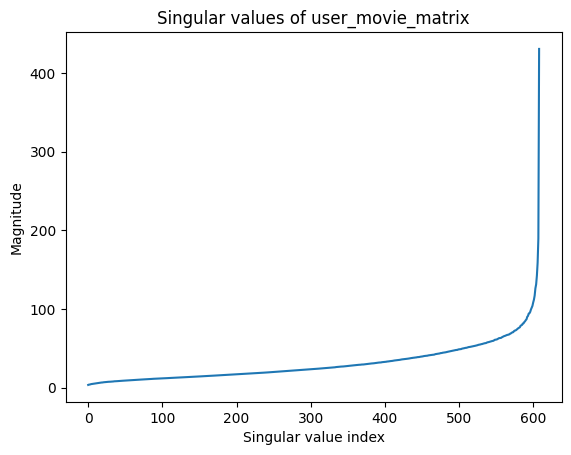

In [ ]:
# Plotting the singular values to understand the distribution of 'energy' or importance across them.
# Think of these like the popularity of movie genres at our festival.
plt.plot(S)
plt.title("Singular values of user_movie_matrix")
plt.xlabel("Singular value index")
plt.ylabel("Magnitude")
plt.show()

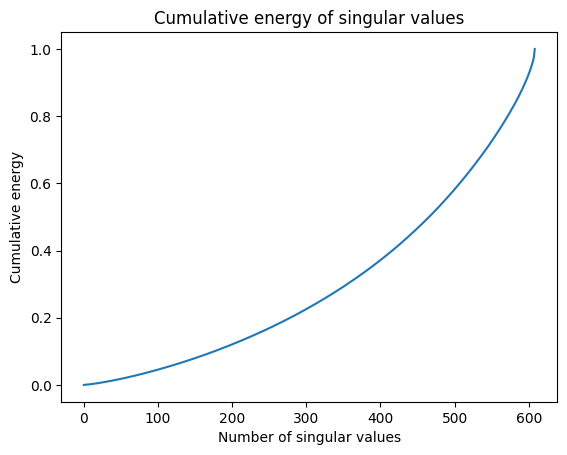

In [ ]:
# Calculating cumulative sum of singular values to determine how many are needed to capture a substantial fraction of the total 'energy'.
cumulative_energy = np.cumsum(S) / np.sum(S)
plt.plot(cumulative_energy)
plt.title("Cumulative energy of singular values")
plt.xlabel("Number of singular values")
plt.ylabel("Cumulative energy")
plt.show()

In [ ]:
# Determining 'optimal_k' such that 95% of the energy is retained.
optimal_k = np.argmax(cumulative_energy >= 0.95) + 1

# Ensuring the chosen 'k' does not exceed the dimensions of the actual matrix.
optimal_k = min(optimal_k, min(train_matrix_csr.shape) - 1)

print(f"Optimal number of dimensions (k) capturing 95% energy: {optimal_k}")

Optimal number of dimensions (k) capturing 95% energy: 605


In [ ]:
# Performing SVD with the determined 'optimal_k' to approximate the original matrix.
U_k, S_k, VT_k = svds(user_movie_matrix_csr, k=optimal_k)
approximation = np.dot(U_k, np.dot(np.diag(S_k), VT_k))
approximation_error = np.linalg.norm(user_movie_matrix - approximation, 'fro')
f"Approximation error using {optimal_k} dimensions: {approximation_error:.2f}"

'Approximation error using 605 dimensions: 8.52'

Overfitting occurs when our model tries to fit the training data too closely, capturing even the noise. It can happen if we consider too many singular values (large k).

Underfitting, on the other hand, occurs when our model is too simple to capture underlying patterns. It can occur with a very small k.

In [ ]:
# Initialize lists to store errors
errors_train = []
errors_test = []
k_values = range(10, min(min(train_matrix_csr.shape), 800), 10)

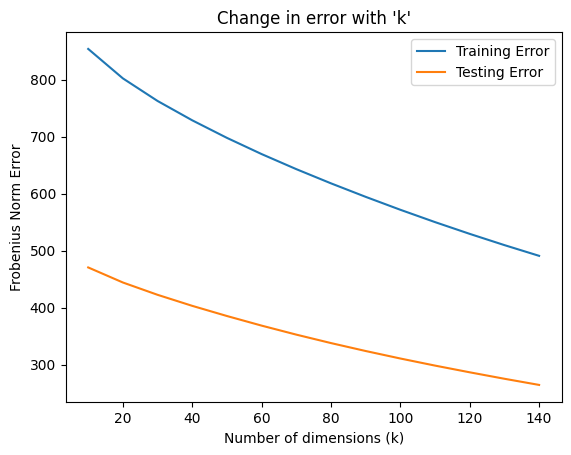

In [ ]:
# Loop through each k value and compute SVD and errors for both train and test set
for k in k_values:
  # Perform SVD on the training data
  U_train, S_train, VT_train = svds(train_matrix_csr, k=k)
  approximation_train = U_train @ np.diag(S_train) @ VT_train
  error_train = np.linalg.norm(train_matrix_csr - approximation_train, 'fro')

  # For the test set, we recompute SVD for the same 'k'
  U_test, S_test, VT_test = svds(test_matrix_csr, k=min(k, test_matrix_csr.shape[0] - 1))
  approximation_test = U_test @ np.diag(S_test) @ VT_test
  error_test = np.linalg.norm(test_matrix_csr - approximation_test, 'fro')

  # Append the errors to the lists
  errors_train.append(error_train)
  errors_test.append(error_test)

plt.plot(k_values, errors_train, label='Training Error')
plt.plot(k_values, errors_test, label='Testing Error')
plt.title("Change in error with 'k'")
plt.xlabel("Number of dimensions (k)")
plt.ylabel("Frobenius Norm Error")
plt.legend()
plt.show()

Alright! Now, let us present you our recommeneder system. But, for you, this is your new friend Om Root, and he recommends you your must-watch 10 movies based on your ratings for the following 12 movies:

1. Forrest Gump (1994)
2. Blade Runner (1982)
3. Fight Club (1999)
4. Into the Wild (2007)
5. WALL·E (2008)
6. Toy Story 3 (2010)
7. Inception (2010)
8. Life of Pi (2012)
9. Guardians of the Galaxy (2014)
10. The Matrix (1999)
11. The Dark Knight (2008)
12. The Shining (1980)

Edit the array `your_ratings` by putting your ratings for each movie above in the same order.

In [ ]:
your_ratings = [5, 8, 9, 10, 6, 2, 8, 10, 3, 5, 8, 1] # Enter your ratings here, inside the array for ecah movie in the same order mentioned above in the markdown.

In [ ]:
def add_ratings(ratings, ids, matrix):
  scaled_ratings = [r / 2 for r in ratings]  # Scale ratings from 1-10 to 1-5
  new_id = matrix.index.max() + 1  # New user ID
  new_row = pd.DataFrame(0, index=[new_id], columns=matrix.columns)
  for m_id, r in zip(ids, scaled_ratings):
      if m_id in new_row.columns:
          new_row.at[new_id, m_id] = r
  updated_matrix = pd.concat([matrix, new_row])
  return updated_matrix.fillna(0)

In [ ]:
import hashlib

def hash_ratings(ratings):
  ratings_str = ''.join(map(str, ratings))
  return int(hashlib.sha256(ratings_str.encode('utf-8')).hexdigest(), 16)

In [ ]:
from sklearn.decomposition import TruncatedSVD

def recommend_svd(ratings, ids, matrix, df, n=10, sensitivity=50):

  seed = hash_ratings(ratings) % (2**32)
  np.random.seed(seed)

  # Normalize user ratings before adding to the matrix
  mean_rating = sum(ratings) / len(ratings)
  normalized_ratings = [(r - mean_rating) for r in ratings]

  # Add normalized user ratings to the matrix
  updated_matrix = add_ratings(normalized_ratings, ids, matrix)
  sparse_matrix = csr_matrix(updated_matrix)

  # Perform SVD
  svd = TruncatedSVD(n_components=sensitivity, random_state=42)
  matrix_svd = svd.fit_transform(sparse_matrix)
  reconstructed = np.dot(matrix_svd, svd.components_)

  # Predict ratings for the new user
  predicted = reconstructed[-1, :]

  # Exclude movies the user has already rated
  movie_indices = [matrix.columns.get_loc(m_id) for m_id in ids if m_id in matrix.columns]
  predicted[movie_indices] = 0

  # Consider a larger pool of top recommendations
  top_indices = predicted.argsort()[-(n*5):][::-1]

  # Map the top indices to the actual movie IDs
  top_movie_ids = [matrix.columns[i] for i in top_indices if i < len(matrix.columns)]


  rec_indices = np.random.choice(top_indices[:len(top_movie_ids)], size=n, replace=False)
  rec_movie_ids = [matrix.columns[i] for i in rec_indices]

  # Get the recommended movie details
  recs = df[df['movieId'].isin(rec_movie_ids)]
  print("Hello, I'm Om Root, a self acclaimed visionary director.\nThanks for giving your ratings for the selected movies.\nI strongly recommend you to watch Aadhipurush. It is one of the best movies with an extremely awesome VFX. \nAnyways, by analyzing your taste, these are your Top 10 recommendations. \n")
  return recs[['movieId', 'title']]


# Define movie IDs for the rated movies
ids = [356, 541, 2959, 55247, 60069, 78499, 79132, 97938, 112852, 2571, 58559, 1258]

# Get recommendations
recs = recommend_svd(your_ratings, ids, user_movie_matrix, movies, n=10)
recs


Hello, I'm Om Root, a self acclaimed visionary director.
Thanks for giving your ratings for the selected movies.
I strongly recommend you to watch Aadhipurush. It is one of the best movies with an extremely awesome VFX. 
Anyways, by analyzing your taste, these are your Top 10 recommendations. 



,movieId,title
190,223,Clerks (1994)
277,318,"Shawshank Redemption, The (1994)"
1054,1371,Star Trek: The Motion Picture (1979)
1261,1676,Starship Troopers (1997)
1917,2542,"Lock, Stock & Two Smoking Barrels (1998)"
4615,6874,Kill Bill: Vol. 1 (2003)
4935,7438,Kill Bill: Vol. 2 (2004)
5972,35836,"40-Year-Old Virgin, The (2005)"
6922,64614,Gran Torino (2008)
7010,68157,Inglourious Basterds (2009)


**Challenges in Recommender systems:**

1. Scalability: Dealing with large datasets.
2. Diversity: Ensuring a diverse set of recommendations.
3. Serendipity: Surprise recommendations.
4. Temporal Dynamics: Changing user preferences over time.
5. Privacy Concerns: Ensuring user data protection.

The cold start problem arises when we have new users or new items in our system for which we don't have enough data to make meaningful recommendations. There are several strategies to handle this, including:
1. Content-Based Recommendations
2. Hybrid Models
3. Asking new users to rate a few items before making recommendations
4. Using demographic or profile data

Hybrid models combine collaborative and content-based filtering to provide recommendations. This approach allows us to exploit the benefits of both techniques:

1. **Collaborative Filtering**: Predicts a user's interests by collecting preferences from many users (collaborating).
2. **Content-based Filtering**: Recommends items by comparing the content of the items and a user profile, with content described in terms of several descriptors.

By combining these methods, we can overcome challenges such as the cold start problem and provide more accurate and personalized recommendations.

Deep Learning has paved the way for sophisticated models in the domain of recommendation systems:

1. **Neural Collaborative Filtering**: An approach that leverages neural networks to learn the implicit relationship between users and items.
2. **AutoEncoders for Recommendations**: These can be used to learn a dense representation of users and items, and the decoder part can reconstruct the unseen data.
3. **RNN-based Recommendations**: If the sequence of user interactions matters (like watching a series of videos or reading a series of articles), RNNs can be very effective.
4. **Embeddings**: Word2Vec or similar embeddings can be used to understand the content of items (like the plot of a movie or a book) and recommend similar items.

Deep learning allows for more complex and nuanced patterns to be recognized, making recommendations even more personalized.

Reinforcement Learning (RL) is about agents who take actions in an environment to maximize cumulative rewards. This paradigm can also be applied to recommender systems:

1. **Agent**: The recommender system.
2. **Environment**: The users.
3. **Actions**: The items to recommend.
4. **Rewards**: User feedback on recommendations.

The idea is for the recommender system to recommend items in such a way that cumulative user satisfaction (or another relevant metric) is maximized over time. This approach allows for a more dynamic and adaptive system that can adjust to changing user preferences.


Recommender systems are everywhere, from e-commerce to content streaming platforms.

Imagine the future! How will recommender systems evolve in the next 5-10 years? Think about advancements in technology, changing user behavior, and more.

Share your thoughts, discuss with peers, and let's predict the future together!